# Practice with Merges

Run the cells below to create the following dataframes.

df_purchases contains information on various customer purchases.

In [23]:
import pandas as pd
from pandasql import sqldf

names = ["Jake", "Joe", "Ellen", "Joe", "Ellen"]
item = ["Ball", "Shirt", "Shoes", "Ball", "Shirt"]

df_purchases = pd.DataFrame({"Name": names, "Item_Purchased": item} )
                    
df_purchases

,Name,Item_Purchased
0,Jake,Ball
1,Joe,Shirt
2,Ellen,Shoes
3,Joe,Ball
4,Ellen,Shirt


df_items contains information on the prices of each item.

In [24]:
item = ["Ball", "Shirt", "Shoes"]
price = [10,15,75]

df_items = pd.DataFrame({"Item": item, "Price":price})

df_items

,Item,Price
0,Ball,10
1,Shirt,15
2,Shoes,75


df_customer contained information on the customers 

In [25]:
customers = ["Jake", "Joe", "Ellen"]
allowance = [15, 12, 85]

df_customers = pd.DataFrame({"Allowance":allowance, "Customers":customers})

df_customers

,Allowance,Customers
0,15,Jake
1,12,Joe
2,85,Ellen


**Question 1:** How many customers went over their allowance?

Create df_1, which is df_purchases with an additional column that gives the price of each item

In [26]:
df_1 = df_purchases.merge(df_items, how = "inner", left_on="Item_Purchased", right_on  = "Item")

df_1 = df_1.loc[:,["Name", "Item", "Price"]]

df_1

,Name,Item,Price
0,Jake,Ball,10
1,Joe,Ball,10
2,Joe,Shirt,15
3,Ellen,Shirt,15
4,Ellen,Shoes,75


Create df_2, which stores the total amount that each person spent.

In [27]:
df_2 = df_1.groupby("Name")["Price"].sum().reset_index()
df_2.columns = ["Names", "Total_Spent"]

df_2

,Names,Total_Spent
0,Ellen,90
1,Jake,10
2,Joe,25


Created df_3, which adds each person't allowance to df_2

In [28]:
df_3 = df_2.merge(df_customers, how = "inner", left_on = ["Names"],\
                 right_on = ["Customers"]).loc[:,:"Allowance"]
df_3

,Names,Total_Spent,Allowance
0,Ellen,90,85
1,Jake,10,15
2,Joe,25,12


Add a column to df_3 which tells whether or not they went over their allowance or not.

In [29]:
df_3["Over"] = df_3["Total_Spent"]>df_3["Allowance"]
df_3

,Names,Total_Spent,Allowance,Over
0,Ellen,90,85,True
1,Jake,10,15,False
2,Joe,25,12,True


Compute how many people went over.

In [30]:
num_over = sum(df_3["Over"])
num_over

2

# Running Back Analysis Tool

The goal in this practice is to analyze the number of rushing yards gained by an inputted running back over the various weeks that the data contains.  We also would like to incorporate whether the given running back went up against good defenses.  To do so, we will compute the average rushing yards given up by each of the given running back's opponents throughout the weeks.


In [31]:
#Place your imports here
import pandas as pd
import matplotlib.pyplot as plt

  Read in the data from the following 4 csv files: nflgames.csv, nflteams.csv, nflplayers.csv, rushingstats.csv. Filter the rushing stats so it only corresponds to running backs (PositionID = 2)

In [32]:
#read in the data below
games = pd.read_csv("Data/Football_Data/nflgames.csv")
teams = pd.read_csv("Data/Football_Data/nflteams.csv")
nflPlayers = pd.read_csv("Data/Football_Data/nflplayers.csv")
rushingStats=pd.read_csv("Data/Football_Data/rushingstats.csv")
rushingStats = rushingStats.loc[rushingStats["PositionID"] == 2, :]
teams.head()

,TeamID,TeamName,TeamCapsAbrv,TeamAbrv
0,1,Baltimore Ravens,RAV,rav
1,2,Denver Broncos,DEN,den
2,3,Oakland Raiders,RAI,rai
3,4,Philadelphia Eagles,PHI,phi
4,5,Dallas Cowboys,DAL,dal


Enter the name of the running back you would like to analyze and then find the player's player ID and Team ID.

In [33]:
#Write your code here
name = "Frank Gore"
playerInfo = nflPlayers.loc[nflPlayers["PlayerName"] == name, :].reset_index(inplace = False)
playerID = playerInfo.loc[0, "PlayerID"]
teamID = playerInfo.loc[0, "TeamID"]
playerID

297

Next select the rushing stats corresponding to this player and merge this df with the games df to find the week. In this merged df select the following columns: TeamID, GameID, Yds, Week, HomeTeamID, AwayTeamID. Sort the resulting df by Week.

In [34]:
#Write your code here
rush_stats_player = rushingStats.loc[rushingStats["PlayerID"] == playerID].loc[:,["TeamID", "GameID", "Yds"]]
rush_stats_w_week = rush_stats_player.merge(games, how = "inner", on = "GameID").loc[:,"TeamID": "AwayTeamID"].sort_values(by = "Week", ascending = True, inplace = False)
rush_stats_w_week


,TeamID,GameID,Yds,Week,HomeTeamID,AwayTeamID
2,16,48,66,1,5,16
6,16,132,63,2,16,30
7,16,133,10,3,17,16
1,16,39,119,4,16,4
4,16,94,107,5,16,10
8,16,134,38,6,18,16
0,16,18,20,7,2,16
9,16,135,49,9,16,18
10,16,136,81,10,22,16
5,16,121,95,11,14,16


Create a line chart showing the rushing yards per game for this player.

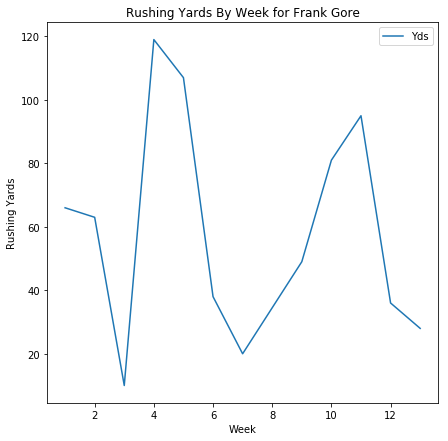

In [35]:
%matplotlib inline

fig, ax = plt.subplots(figsize = [7,7])
rush_stats_w_week.plot(kind = "line", x = "Week", y = "Yds", ax = ax)
ax.set(title = "Rushing Yards By Week for %s" %name, xlabel="Week", ylabel="Rushing Yards")

We will continue to add to the plot above, but first we need to do some more calculations. We would like to find the avg. rushing yards given up by each of this player's opponents.  Add a column to the df you just plotted that stores this player's opponent each week.

In [36]:
#Write your code here
rush_stats_w_week["Opponent_ID"] = rush_stats_w_week.apply(lambda row: row["HomeTeamID"] if row["HomeTeamID"]!= teamID else row["AwayTeamID"], axis = 1)

rush_stats_w_week

,TeamID,GameID,Yds,Week,HomeTeamID,AwayTeamID,Opponent_ID
2,16,48,66,1,5,16,5
6,16,132,63,2,16,30,30
7,16,133,10,3,17,16,17
1,16,39,119,4,16,4,4
4,16,94,107,5,16,10,10
8,16,134,38,6,18,16,18
0,16,18,20,7,2,16,2
9,16,135,49,9,16,18,18
10,16,136,81,10,22,16,22
5,16,121,95,11,14,16,14


Merge the df above with games to get all of the games which involve one of the player's opponents.  First merge on the HomeTeamID and then on the AwayTeamID and then concatenate.

In [37]:
df_opponent_games_away = games.merge(rush_stats_w_week, how="inner", left_on=["AwayTeamID"],right_on=["Opponent_ID"])
df_opponent_games_home = games.merge(rush_stats_w_week, how="inner", left_on=["HomeTeamID"],right_on=["Opponent_ID"])
df_opponent_games = pd.concat([df_opponent_games_away,df_opponent_games_home], axis = 0, ignore_index=True)

#get the opponent of the opponent
df_opponent_games["Opp_Opp_ID"] = df_opponent_games.apply(lambda row: row["HomeTeamID_x"] if row["HomeTeamID_x"]!=row["Opponent_ID"] else row["AwayTeamID_x"], axis = 1 )
df_opponent_games.head()

,GameID_x,Week_x,HomeTeamID_x,AwayTeamID_x,HomeScore,AwayScore,DayOfWeek,TimeOfDay,FieldType,Temp,Wind,TeamID,GameID_y,Yds,Week_y,HomeTeamID_y,AwayTeamID_y,Opponent_ID,Opp_Opp_ID
0,14,2,2,10,24,17,Sun,Day,grass,85,7,16,94,107,5,16,10,10,2
1,34,12,3,10,24,20,Thu,Night,grass,57,6,16,94,107,5,16,10,10,3
2,88,7,9,10,20,23,Sun,Day,grass,75,2,16,94,107,5,16,10,10,9
3,92,3,25,10,15,34,Sun,Day,grass,88,4,16,94,107,5,16,10,10,25
4,94,5,16,10,22,17,Sun,Day,grass,85,1,16,94,107,5,16,10,10,16


Select out only GameID_x, Week_x and Opponent_ID and rename the columns to get rid of _x.

In [38]:
df_opponent_games = df_opponent_games.loc[:,["GameID_x", "Week_x","Opp_Opp_ID", "Opponent_ID"]]
df_opponent_games.columns = ["GameID", "Week","Opp_Opp_ID", "Opponent_ID"]
df_opponent_games.head()

,GameID,Week,Opp_Opp_ID,Opponent_ID
0,14,2,2,10
1,34,12,3,10
2,88,7,9,10
3,92,3,25,10
4,94,5,16,10


Now merge this with rushing states to get the rushing yards gained by opponent running backs in each of these games.

In [39]:
df_opponent_rushing  = df_opponent_games.merge(rushingStats, how = "inner", left_on=["GameID", "Opp_Opp_ID" ],\
                                                right_on = ["GameID", "TeamID"])

df_opponent_rushing.head()

,GameID,Week,Opp_Opp_ID,Opponent_ID,RushingStatsID,PlayerID,PositionID,TeamID,Att,Yds,...,TD,RunShort,RunFive,RunFifteen,RunThirtyPlus,RZInsideTwenty,RZInsideTen,RZInsideFive,RZTD,RZTotal
0,14,2,2,10,44,17,2,2,5,31,...,0,3,2,0,0,0,0,0,0,0
1,14,2,2,10,54,18,2,2,12,60,...,0,8,2,2,0,1,1,2,0,4
2,34,12,3,10,109,42,2,3,3,-1,...,0,3,0,0,0,0,0,0,0,0
3,34,12,3,10,121,45,2,3,12,29,...,0,7,5,0,0,0,0,0,0,0
4,34,12,3,10,129,48,2,3,4,112,...,2,0,4,0,1,1,0,0,1,1


Next, we group by Opponent_ID.

In [40]:
max_opponent_yards_week = df_opponent_rushing.groupby(["Opponent_ID", "Week"])["Yds"].max().reset_index(inplace = False)
avg_opponent_yards = max_opponent_yards_week.groupby("Opponent_ID")["Yds"].mean().reset_index(inplace = False)
avg_opponent_yards

,Opponent_ID,Yds
0,2,44.833333
1,4,63.750000
2,5,76.166667
3,8,62.416667
4,10,84.000000
5,14,84.250000
6,17,58.750000
7,18,65.916667
8,22,81.333333
9,23,56.583333


Finally, merge this with rush_stats_w_week.

In [41]:
combined_stats = rush_stats_w_week.merge(avg_opponent_yards, how = "inner", on = "Opponent_ID")
combined_stats.rename(columns={"Yds_y": "Opponent_Yds_Allowed"}, inplace=True)


combined_stats_final = combined_stats.merge(teams[["TeamID", "TeamCapsAbrv"]], how = "inner", left_on = "Opponent_ID", \
                                           right_on = "TeamID")


combined_stats_final

,TeamID_x,GameID,Yds_x,Week,HomeTeamID,AwayTeamID,Opponent_ID,Opponent_Yds_Allowed,TeamID_y,TeamCapsAbrv
0,16,48,66,1,5,16,5,76.166667,5,DAL
1,16,132,63,2,16,30,30,54.181818,30,CHI
2,16,133,10,3,17,16,17,58.750000,17,CRD
3,16,39,119,4,16,4,4,63.750000,4,PHI
4,16,94,107,5,16,10,10,84.000000,10,KAN
5,16,134,38,6,18,16,18,65.916667,18,RAM
6,16,135,49,9,16,18,18,65.916667,18,RAM
7,16,18,20,7,2,16,2,44.833333,2,DEN
8,16,136,81,10,22,16,22,81.333333,22,NOR
9,16,121,95,11,14,16,14,84.250000,14,NYG


Produce the desired plot.

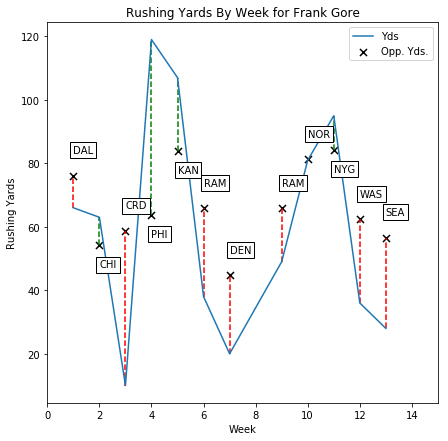

In [42]:
fig, ax = plt.subplots(figsize = [7,7])
rush_stats_w_week.plot(kind = "line", x = "Week", y = "Yds", ax = ax)
ax.set_xlim([0,15])
combined_stats_final.plot(kind = "scatter", x= "Week", y = "Opponent_Yds_Allowed", color = "#000000", marker = "x", s=50, ax=ax, label = "Opp. Yds.")

for index,row in combined_stats_final.iterrows():
    week = row["Week"]
    player_yds = row["Yds_x"]
    opponenent_yds = row["Opponent_Yds_Allowed"]
    opp = row["TeamCapsAbrv"]

    if player_yds >= opponenent_yds:
        ax.vlines(week, ymin = opponenent_yds, ymax=player_yds, color = "g", linestyles="--")
        ax.annotate(opp, xy = (week, opponenent_yds - 7), bbox = {"boxstyle" :"square", "fc": "white"})

    else:
        ax.vlines(week, ymax = opponenent_yds, ymin=player_yds, color = "r", linestyles="--")
        ax.annotate(opp, xy = (week, opponenent_yds + 7), bbox = {"boxstyle" :"square", "fc": "white"})


ax.set(title = "Rushing Yards By Week for %s" %name, xlabel="Week", ylabel="Rushing Yards")
ax.legend(loc = 0)